# Lab01: Initial Value Problems
Due date: 11:59pm September 10, 2019<br>
Connor Poetzinger

### 1. Introduction 

This lab covers Newton's method, Lagrange interpolation and forward and backward Euler.

###  2. Newton's Method

Create a function *Newtons_Method* to find the root(s) of a function *f(x)*. Start from an initial guess *x0*, to successively better the approximation of the root. If *f(x)* has continuous derivatives, Newton's method will converge to x<sup>*</sup> if our initial guess is reasonable.

\begin{equation*}
x_{k+1} = x_k - \frac{f(x_k)}{f^{'}(x_k)}
\end{equation*}

### 2.3 Code Deliverable 

In [1]:
import numpy as np
import pandas as pd 

def newtons_method(maxIter, tol, f, f_prime, x0):
    """
    Implementation of Newton's Method
    Input: 
        maxIter - maximum number of iterations
        tol - telerance used for stopping criteria 
        f - the function handle for the function f(x)
        f_prime - the function handle for the function's derivative
        x0 - the initial point 
    Output: 
        x1 - approximations 
        iter - numbre of iterations 
    """
    #begin counting iterations 
    iter = 0
    #iterate while the iteration counter is less than your iteration cap and 
    #the function value is not close to 0
    while (iter < maxIter and abs(f(x0)) > tol):
        #Newton's method definition 
        x1 = x0 - f(x0)/f_prime(x0)
        #update counter 
        iter += 1
        #disrupt loop if error is less than your tolerance 
        if (abs(x1 - x0) < tol):
            break
        #update position
        else:
            x0 = x1
            
        data = {"Iteration": [iter], "Approximation": [round(x1,4)], "|x_k - 1|": ["{:.2e}".format(abs(x1 -1))]}
        print(data)
    return

def f(x):
    """
    Function definition for f(x)
    """
    #return f(x) = x^2 - 1
    return x**2 - 1

def f_prime(x):
    """
    Function definition for the derivative of f(x)
    """
    #return derivative of f(x) = x^2 - 1 --> 2x
    return 2*x

### 2.4 Code Check

In [2]:
newtons_method(6, 1.0*10**-8, f, f_prime, 2)

{'Iteration': [1], 'Approximation': [1.25], '|x_k - 1|': ['2.50e-01']}
{'Iteration': [2], 'Approximation': [1.025], '|x_k - 1|': ['2.50e-02']}
{'Iteration': [3], 'Approximation': [1.0003], '|x_k - 1|': ['3.05e-04']}
{'Iteration': [4], 'Approximation': [1.0], '|x_k - 1|': ['4.65e-08']}
{'Iteration': [5], 'Approximation': [1.0], '|x_k - 1|': ['1.11e-15']}


### 3. Lagrange Interpolation

Create a function *lagrange_interp* to find the value of the Lagrange Interpolation polynomial evaluated at a point *x*. We define the Lagrange interpolation polynomial

\begin{equation*}
p(x): = \sum_{i=1}^n y_i L_i (x)
\end{equation*}

The Lagrange polynomials are defined as 

\begin{equation*}
L_i (x) := \prod_{j=0, j\neq1} \frac{x - x_j}{x_i - x_j}
\end{equation*}

### 3.1 Code Deliverable

In [3]:
#import external modules
import numpy as np

def lagrange_interp(x, xvals, yvals):
    """
    Input:
        x - interpolation points. All four values are set to one variable and indexed at function call
        xvals - target points equispaced using linspace(-1, 1, 500)
        yvals - function values evaluated at the interpolation points
    Output: 
        y - the value of the Lagrange interpolation polynomial evaluated at the point x
    """
    #get the length of the interpolation points
    # this variable will be used to assign the limit of iteration 
    n = len(x)
    #call basis function to calculate vector of lagrange polynomials 
    lagrange_poly = lagrange_basis(x, xvals)
    #assign y to 0
    y = 0
    #iterate
    for i in range(n):
        #calculate the sum of element wise multiplication of the function values
        #yvals and basis vector created by lagrange_basis
        y += yvals[i] * lagrange_poly[i]
    return y 

def lagrange_basis(x, xvals):
    """
    Input: 
        x - interpolation points. All four values are set to one variable and indexed at function call
        xvals - target points equispaced using linspace(-1, 1, 500)
    Output:
        y - returns a vector of lagrange polynomials evaluated at the target point x
    """
    #get the length of the interpolation points
    # this variable will be used to assign the limit of iteration 
    n = len(x)
    #preallocate y variable with 500 1's
    y = np.ones(n)
    for i in range(n):
        for j in range(n):
            #constraint to prevent i = j
            if i != j:
                #calculate lagrange polynomials evaluated at the target point
                #*= to find product 
                y[i] *= (xvals - x[j]) / (x[i] - x[j])
    return y 

### 3.2.1 Runge Phenomenon

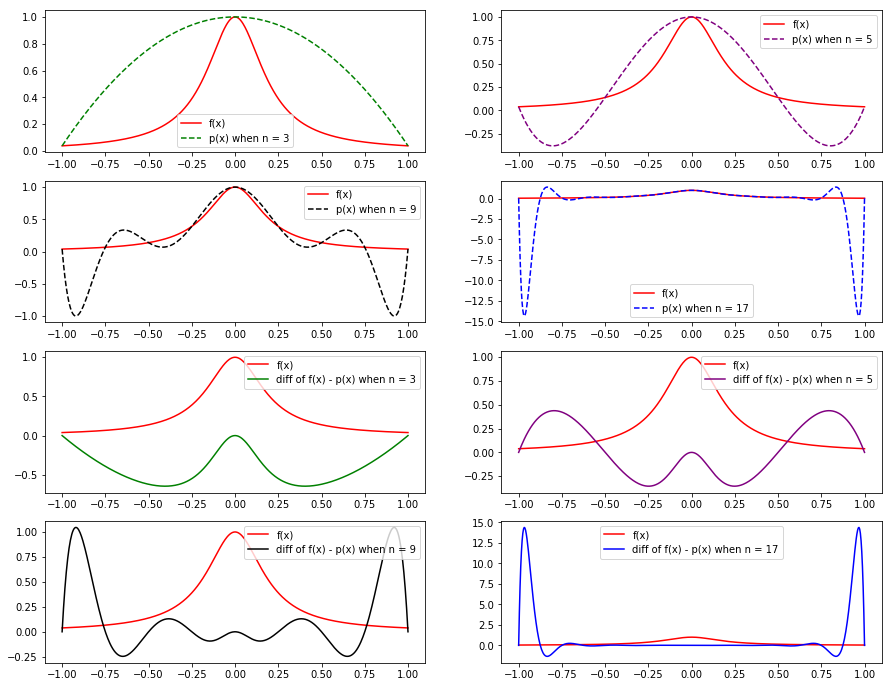

In [14]:
#import external modules
import matplotlib.pyplot as plt 
%matplotlib inline

#runge function 
runge = lambda x: 1/(1 + 25*x**2)

#500 equispaced target points in [-1, 1]
xvals = np.linspace(-1, 1, 500)

#interpolation points using list comprehension for code redundency. 
x = [np.linspace(-1, 1, q) for q in [3, 5, 9, 17]]

# n = len(x[3])
# for i in range(1, n):
#     chev = np.cos(((2*i - 1)/2*n)*np.pi)
#     print(chev)

#initialize polynomials with size 500
p1 = np.zeros(500)
p2 = np.zeros(500)
p3 = np.zeros(500)
p4 = np.zeros(500)

#call function lagrange_interp using list comprehension
#x[1..4] is interpolation points indexed at different n values 
#xvals[i] is iterating through the length of p(s) (500) to be used in lagrange_basis to subtract from x[j]
#runge(x[1..4]) calls the runge function evaluated at each set of interpolation points
p1 = [lagrange_interp(x[0], xvals[i], runge(x[0])) for i in range(len(p1))]
p2 = [lagrange_interp(x[1], xvals[i], runge(x[1])) for i in range(len(p2))]
p3 = [lagrange_interp(x[2], xvals[i], runge(x[2])) for i in range(len(p3))]
p4 = [lagrange_interp(x[3], xvals[i], runge(x[3])) for i in range(len(p4))]

#Calculate differences of f(x) and p(x) for each case
diff1 = runge(xvals) - p1
diff2 = runge(xvals) - p2
diff3 = runge(xvals) - p3
diff4 = runge(xvals) - p4

#plotting (find better way to limit repeated code)
plt.figure(1, figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p1, color='green', linestyle='dashed', label='p(x) when n = 3')
plt.legend()

plt.subplot(4,2,2)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p2, color='purple', linestyle='dashed', label='p(x) when n = 5')
plt.legend()

plt.subplot(4,2,3)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p3, color='black', linestyle='dashed', label='p(x) when n = 9')
plt.legend()

plt.subplot(4,2,4)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p4, color='blue', linestyle='dashed', label='p(x) when n = 17')
plt.legend()

plt.subplot(4,2,5)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff1, color='green', label='diff of f(x) - p(x) when n = 3')
plt.legend()

plt.subplot(4,2,6)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff2, color='purple', label='diff of f(x) - p(x) when n = 5')
plt.legend()

plt.subplot(4,2,7)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff3, color='black', label='diff of f(x) - p(x) when n = 9')
plt.legend()

plt.subplot(4,2,8)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff4, color='blue', label='diff of f(x) - p(x) when n = 17')
plt.legend()

#### 3.2.1 Results 

Discuss results

### 3.2.2 Chebyshev Points

### 4. Euler Methods

### 4.1 Forward Euler

Create a function, *Forward_Euler* to find an approximate solution *Y<sup>n</sup>*, at discrete time steps. The forward, or explicit, Euler method is:

\begin{equation*}
Y^{n+1} := Y^n + dtf(Y^n, t^n)
\end{equation*}

### 4.2 Code Deliverable

In [5]:
#import external modules
import numpy as np
import matplotlib.pyplot as plt

# def forward_euler(y0, t0, tf, dt, f):
def forward_euler(f, t, y0, dt):
    """
    Implementation of the Forward Euler method 
    y[i+1] = y[i] + h * f(x[i], y[i]) where f(x[i], y[i]) is the differntial 
    equation evaluated at x[i] and y[i]
    Input:
        f - function f(y,t)
        t - data structure is a numpy array with t[0] initial time and t[-1] final time
        y0 - data structure is a numpy array with initial value 1.0
        dt - data structure is a numpy array time step
    Output:
        x - vector of time steps 
        y - vector of approximate solutions
    """
    #iterate through eatch delta t 
    for h in dt:
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        x = np.arange(t[0], t[-1]+h, h)
        #initialize temp array to store solution for each dt when t = 1
        temp = np.empty([1, len(x)])
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        y = np.zeros(len(x+1))
        #assign time at position 0 to starting time (0.0) and set approximation at time 
        #step 0 = 1.0 which is the initial value given 
        x[0], y[0] = t[0] ,y0
        #apply Euler's method 
        for i in range(1, len(x)):
            y[i] = y[i-1] + h * f(x[i - 1], y[i - 1])
                  
    #create plot
    plt.plot(x, y, label="Approximation")
    plt.plot(x, exact(x), label="Exact")
    plt.title("Euler's Method Example, N ="+str(len(x)))
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid()
    
    #return time (x) and approximations (y)
    return x, y


def f(t, y):
    """ 
    IVP function y'(t) to approximate the derivative
    """
    return -(t * (np.exp((-t**2)/2)))

def exact(t):
    """
    IVP function that provides the exact solution  to y(t)
    """
    return np.exp((-t**2)/2)

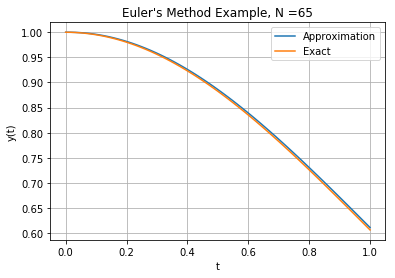

In [6]:
# initial values 
dt = np.asarray([1/(2**x) for x in range(2,7)])
t = np.array([0.0, 1.0])
y0 = np.array([1.0])
ts, ys = forward_euler(f, t, y0, dt)

err = lambda x,y: np.sum(np.abs(x - y)/np.abs(x))
err_res = err(exact(ts), ys)

#### 3.2 Backward Euler